# CLUSTERING TECHNIQUES

## USE OF DATASETS WITH GROUND TRUTH FOR COMPARING THE DIFFERENT TECHNIQUES

### FIRST DATASET - BBC NEWS - A BASELINE DATASET WITH FIVE LABELS (GROUND TRUTH K=5)

In [1]:
import pandas as pd
import numpy as np
import spacy

#load the dataset
dataset_filepath = 'datasets/bbc_news_train.csv'
bbc_df = pd.read_csv(dataset_filepath)
bbc_cols = bbc_df.columns.to_list()
print(f'The length of the dataset is: {len(bbc_df)}')
print(bbc_cols)

The length of the dataset is: 1490
['ArticleId', 'Text', 'Category']


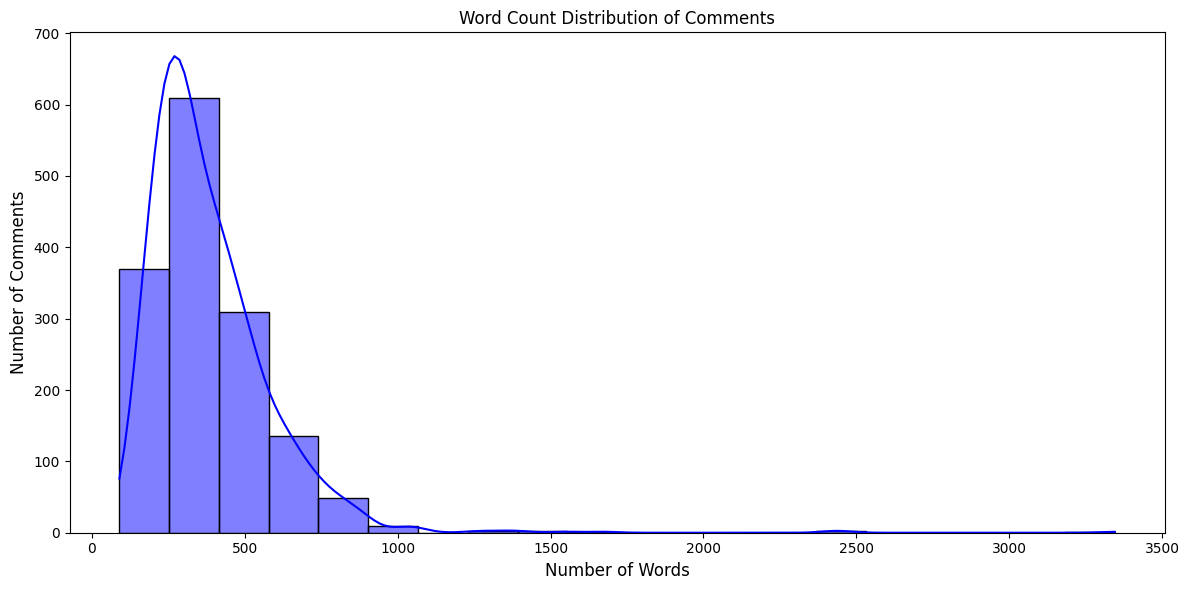

In [2]:
from utils.plot_words_distribution import plot_distribution_of_words
# rename some columns
bbc_df = bbc_df.rename(columns={
    'Category': 'topic', 
    'Text': 'review'
})

# define the column name of the text
text_col = 'review'
label_col='topic'

# plot the words distribution
plot_distribution_of_words(bbc_df, text_col)

In [3]:
# display the different topics
print(f'The topics of this dataset are: {bbc_df.topic.unique()}')
print(f'The number of topics is: {bbc_df.topic.nunique()}')

The topics of this dataset are: ['business' 'tech' 'politics' 'sport' 'entertainment']
The number of topics is: 5


### CREATE THE NECESSARY UTILS FOR PREPARING THE DATA

In [4]:
from sklearn.preprocessing import LabelEncoder
from utils.load_pretrained_spacy_model import load_pretrained_model
from sklearn.model_selection import train_test_split

x_train_bbc, x_test_bbc, y_train_bbc, y_test_bbc = train_test_split(
    bbc_df,
    bbc_df[label_col],
    test_size=0.1,
    random_state=42,
    stratify=bbc_df[label_col],
)

# load the pretrained spacy model
x_test_bbc, nlp_pretrained_name = load_pretrained_model(df=x_test_bbc, text_col=text_col)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Convert the string labels to integer labels
labels_bbc = label_encoder.fit_transform(y_test_bbc)

The language of the dataset is: en


### 1ST CLUSTERING TECHNIQUE: KMEANS

We are going to implement the original KMeans without using any constraints. For transforming the data we are going to use TF-IDF and FastText embeddings.

#### USING TF-IDF VECTORIZATION

C:\1. Python\LLM_mods_Topic_Modelling\venv\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\1. Python\LLM_mods_Topic_Modelling\venv\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


Sentences transformed successfully via TF-IDF vectorizer


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:13<00:00,  3.80it/s]

The optimum kappa based on Silhouette score is: 49


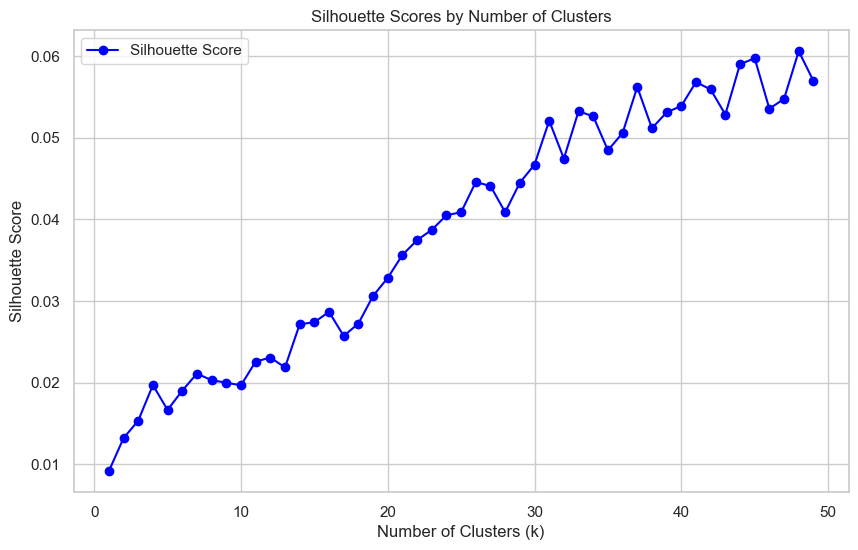

The NMI score is: 0.5461709136848903 for the best Kappa 49
The AMI score is: 0.3789853910020212 for the best Kappa 49
The ARI score is: 0.11601301952053897 for the best Kappa 49


In [5]:
from clustering_algorithms.kmeans import calc_kmeans
from utils.text_to_embeddings import calc_tf_idf_vectors

# define the spacy model
nlp = spacy.load(nlp_pretrained_name)

# define the corpus
corpus = bbc_df[text_col].to_list()

# calc TF-IDF features
transformed_data_tfidf = calc_tf_idf_vectors(corpus, x_test_bbc[text_col], nlp)

max_num_of_clusters = 50

# calculate the optimun kappa with KMeans via Silhouette score and using TF-IDF
kmeans_results_tfidf = calc_kmeans(transformed_data_tfidf, max_num_of_clusters, true_labels=labels_bbc)

#### USING FASTTEXT VECTORIZATION

Sentences transformed successfully via pretrained FastText language model


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:06<00:00,  7.97it/s]


The optimum kappa based on Silhouette score is: 2


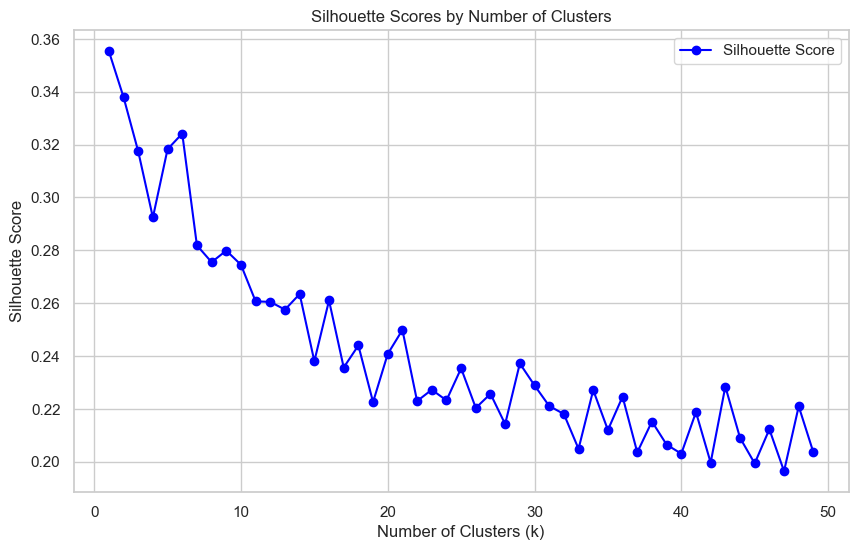

The NMI score is: 0.3038338061775873 for the best Kappa 2
The AMI score is: 0.289281559309269 for the best Kappa 2
The ARI score is: 0.23166770739520734 for the best Kappa 2


In [6]:
from clustering_algorithms.kmeans import calc_kmeans
from utils.text_to_embeddings import train_fasttext_and_transform

# define the corpus
corpus = bbc_df[text_col].to_list()

transformed_data_fasttext = train_fasttext_and_transform(corpus, x_test_bbc[text_col].to_list(), text_col)

max_num_of_clusters = 50

# calculate the optimun kappa with KMeans via Silhouette score and using FastText
kmeans_results_fasttext = calc_kmeans(transformed_data_fasttext, max_num_of_clusters, true_labels=labels_bbc)

#### USING SENTENCE TRANSFORMER EMBEDDINGS

C:\1. Python\LLM_mods_Topic_Modelling\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Available device for the model is: 'cuda'


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:11<00:00,  2.32s/it]


Calculation of embeddings completed successfully


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 10.14it/s]


The optimum kappa based on Silhouette score is: 10


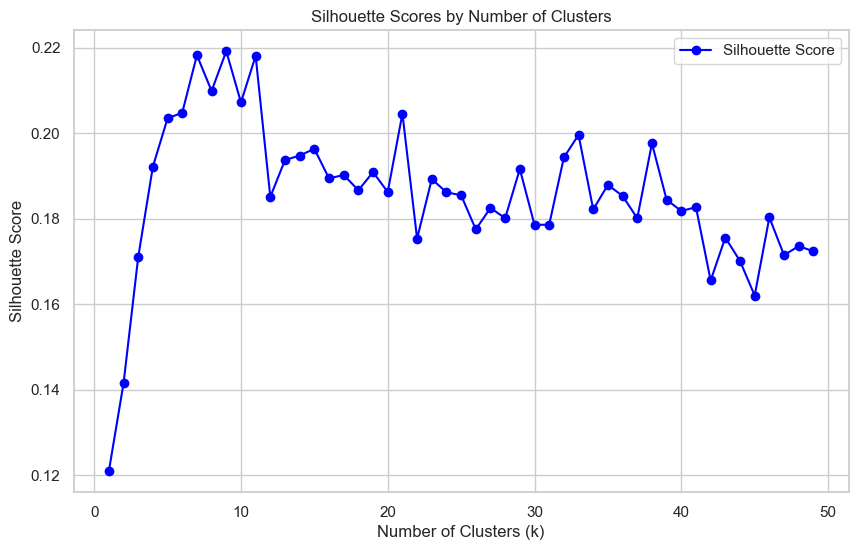

The NMI score is: 0.7218303148898492 for the best Kappa 10
The AMI score is: 0.7007656499844188 for the best Kappa 10
The ARI score is: 0.5451498964813044 for the best Kappa 10


In [5]:
from clustering_algorithms.kmeans import calc_kmeans
from utils.text_to_embeddings import calc_embeddings
from sklearn.decomposition import PCA

transformed_data_embeddings = calc_embeddings(x_test_bbc[text_col].to_list())

# Reduce the dimensionality of embeddings
pca = PCA(n_components=16) 
reduced_data = pca.fit_transform(transformed_data_embeddings)

max_num_of_clusters = 50
# calculate the optimun kappa with KMeans via Silhouette score and using sentence Transformer MPNET-V2
kmeans_results_mpnet_embeddings = calc_kmeans(reduced_data, max_num_of_clusters, true_labels=labels_bbc)

#### USING OPENAI ADA TEXT EMBEDDINGS

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:07<00:00,  6.85it/s]


The optimum kappa based on Silhouette score is: 9


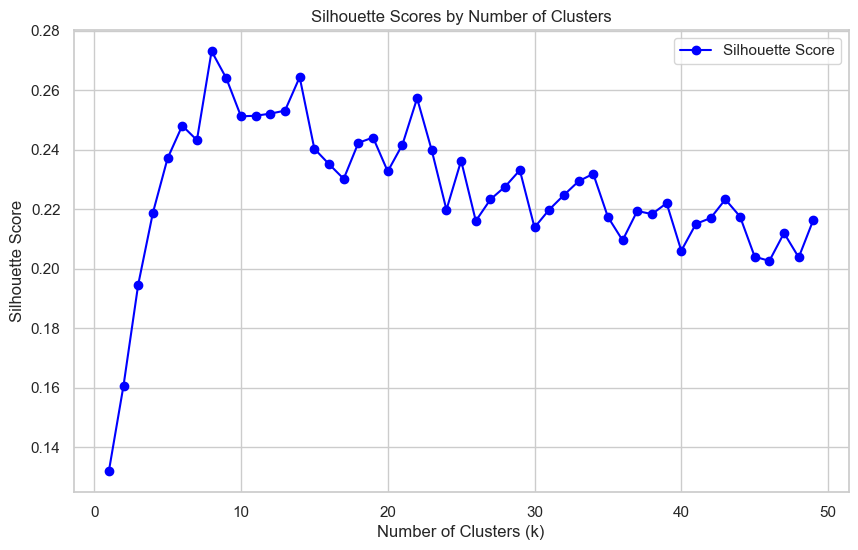

The NMI score is: 0.8 for the best Kappa 9
The AMI score is: 0.79 for the best Kappa 9
The ARI score is: 0.7 for the best Kappa 9


In [6]:
from clustering_algorithms.kmeans import calc_kmeans
from utils.GPT_Prompting import PromptingGPT
from sklearn.decomposition import PCA

# Create a new instance of GPT model
gpt_embeddings = PromptingGPT()

# openai_ada_embeddings = gpt_embeddings.get_embeddings(texts=x_test_bbc[text_col], max_token_length=8000)

# Reduce the dimensionality of embeddings
pca = PCA(n_components=14) 
reduced_data = pca.fit_transform(openai_ada_embeddings)

max_num_of_clusters = 50
# calculate the optimun kappa with KMeans via Silhouette score and using OPENAI embeddings ADA-002
kmeans_results_ada_embeddings = calc_kmeans(transformed_data=reduced_data, 
                                            max_clusters=max_num_of_clusters, 
                                            true_labels=labels_bbc)

### 2ND CLUSTERING TECHNIQUE: KMEANS CONSTRAINED (DEFINE MIN SIZE OF CLUSTERS)

#### USING SENTENCE TRANSFORMER EMBEDDINGS

 57%|█████████████████████████████████████████████████████████████████████████████████▏                                                            | 28/49 [00:04<00:03,  6.30it/s]


The product of size_min and n_clusters cannot exceed the number of samples.
Terminating the calculation...
The optimum kappa based on Penalized Silhouette score is: 8


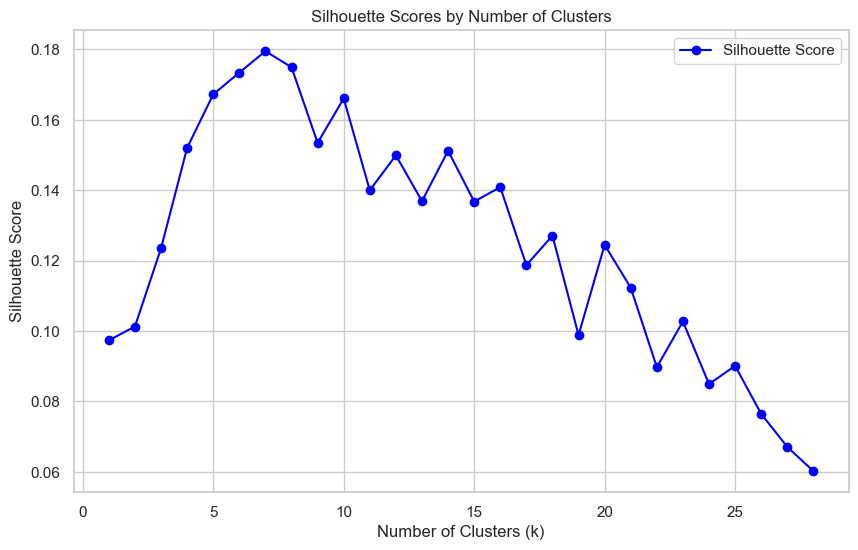

The NMI score is: 0.7372691930389619 for the best Kappa 8
The AMI score is: 0.7191685293058757 for the best Kappa 8
The ARI score is: 0.5937557036212503 for the best Kappa 8


In [14]:
from clustering_algorithms.kmeans_constrained import get_number_of_clusters_with_statistic_constrained
from utils.text_to_embeddings import calc_embeddings
from sklearn.decomposition import PCA

# transformed_data_embeddings = calc_embeddings(x_test_bbc[text_col].to_list())

# Reduce the dimensionality of embeddings
pca = PCA(n_components=16) 
reduced_data = pca.fit_transform(transformed_data_embeddings)
max_num_of_clusters = 50

# calculate the optimun kappa with KMeans Constrained via Silhouette score and using sentence Transformer MPNET-V2
kmeans_cv_results_mpnet_embeddings = get_number_of_clusters_with_statistic_constrained(transformed_data=reduced_data, 
                                                                                       max_clusters=max_num_of_clusters, 
                                                                                       cluster_min_size=5, 
                                                                                       true_labels=labels_bbc)

#### USING OPENAI ADA TEXT EMBEDDINGS

 57%|█████████████████████████████████████████████████████████████████████████████████▏                                                            | 28/49 [00:04<00:03,  6.51it/s]

The product of size_min and n_clusters cannot exceed the number of samples.
Terminating the calculation...
The optimum kappa based on Penalized Silhouette score is: 8


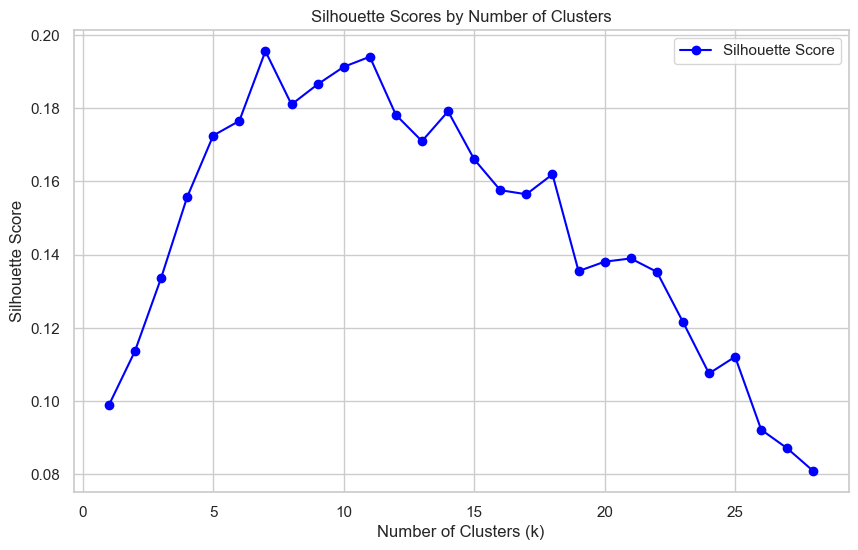

The NMI score is: 0.7872792893899805 for the best Kappa 8
The AMI score is: 0.7726649962135578 for the best Kappa 8
The ARI score is: 0.6437511168616132 for the best Kappa 8


In [13]:
from clustering_algorithms.kmeans import calc_kmeans
from utils.GPT_Prompting import PromptingGPT
from sklearn.decomposition import PCA

# Create a new instance of GPT model
gpt_embeddings = PromptingGPT()

# openai_ada_embeddings = gpt_embeddings.get_embeddings(texts=x_test_bbc[text_col], max_token_length=8000)

# Reduce the dimensionality of embeddings
pca = PCA(n_components=16) 
reduced_data = pca.fit_transform(openai_ada_embeddings)

max_num_of_clusters = 50
# calculate the optimun kappa with KMeans Constrained via Silhouette score and using OPENAI embeddings ADA-002
kmeans_results_ada_embeddings =  get_number_of_clusters_with_statistic_constrained(transformed_data=reduced_data,
                                                                                   max_clusters=max_num_of_clusters,
                                                                                   cluster_min_size=5,
                                                                                   true_labels=labels_bbc)

### 3RD CLUSTERING TECHNIQUE: AGGLOMERATIVE

#### USING SENTENCE TRANSFORMER EMBEDDINGS

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 205.35it/s]


The optimal number of clusters based on Silhouette score is: 17


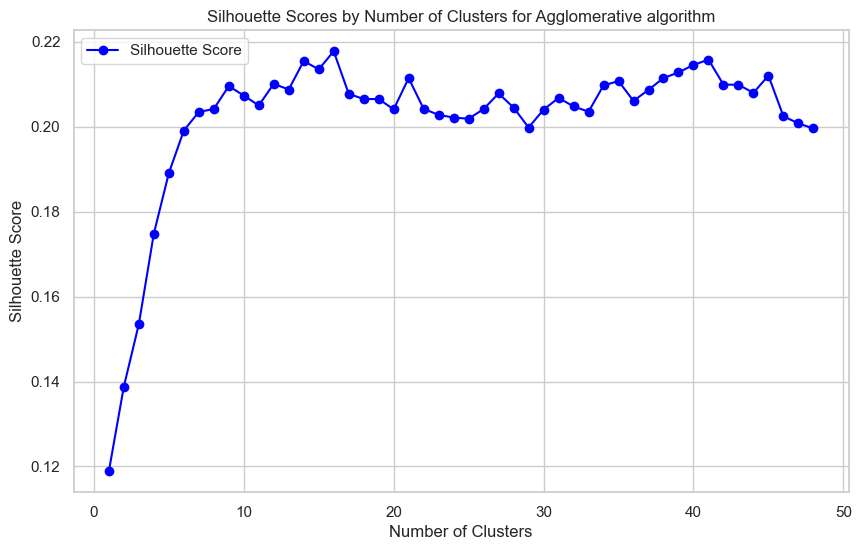

The NMI score is: 0.6600850674273343 for the best Kappa 17
The AMI score is: 0.6118636755936961 for the best Kappa 17
The ARI score is: 0.3778228750646361 for the best Kappa 17


In [15]:
from clustering_algorithms.agglomerative import calc_agglomerative
from utils.text_to_embeddings import calc_embeddings
from sklearn.decomposition import PCA

# transformed_data_embeddings = calc_embeddings(x_test_bbc[text_col].to_list())

# Reduce the dimensionality of embeddings
pca = PCA(n_components=16) 
reduced_data = pca.fit_transform(transformed_data_embeddings)
max_num_of_clusters = 50

cluster_values = range(1,50)

# calculate the optimun kappa with Agglomerative clustering algorithm via Silhouette score and using sentence Transformer MPNET-V2
agglomerative_results_mpnet_embeddings = calc_agglomerative(transformed_data=reduced_data,
                                                            n_clusters_values=cluster_values,
                                                            true_labels=labels_bbc)

#### USING OPENAI ADA TEXT EMBEDDINGS

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 215.61it/s]


The optimal number of clusters based on Silhouette score is: 20


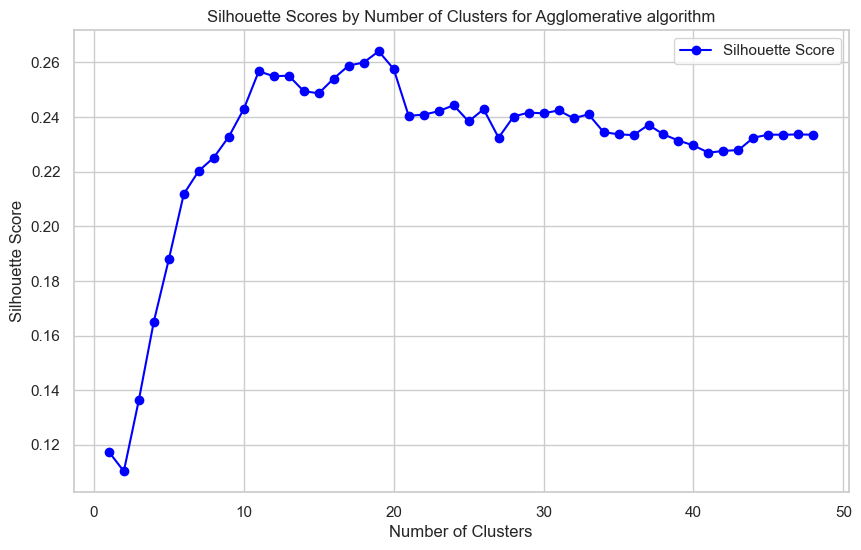

The NMI score is: 0.6469645847143883 for the best Kappa 20
The AMI score is: 0.5885247269934479 for the best Kappa 20
The ARI score is: 0.3489287885926975 for the best Kappa 20


In [17]:
from clustering_algorithms.agglomerative import calc_agglomerative
from utils.GPT_Prompting import PromptingGPT
from sklearn.decomposition import PCA

# # Create a new instance of GPT model
# gpt_embeddings = PromptingGPT()
# openai_ada_embeddings = gpt_embeddings.get_embeddings(texts=x_test_bbc[text_col], max_token_length=8000)

# Reduce the dimensionality of embeddings
pca = PCA(n_components=16) 
reduced_data = pca.fit_transform(openai_ada_embeddings)


cluster_values = range(1,50)

# calculate the optimun kappa with Agglomerative clustering algorithm via Silhouette score and using OPENAI embeddings ADA-002
agglomerative_results_ada_embeddings = calc_agglomerative(transformed_data=reduced_data,
                                                            n_clusters_values=cluster_values,
                                                            true_labels=labels_bbc)

### 4TH CLUSTERING TECHNIQUE: HDBSCAN (HIERARCHICAL DENSITY-BASED CLUSTERING NON-PARAMETRIC ALGORITHM)

#### USING SENTENCE TRANSFORMER EMBEDDINGS

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 38.17it/s]


The optimal min_cluster_size based on Silhouette score is: 2
The number of clusters for optimal min_cluster_size is: 2


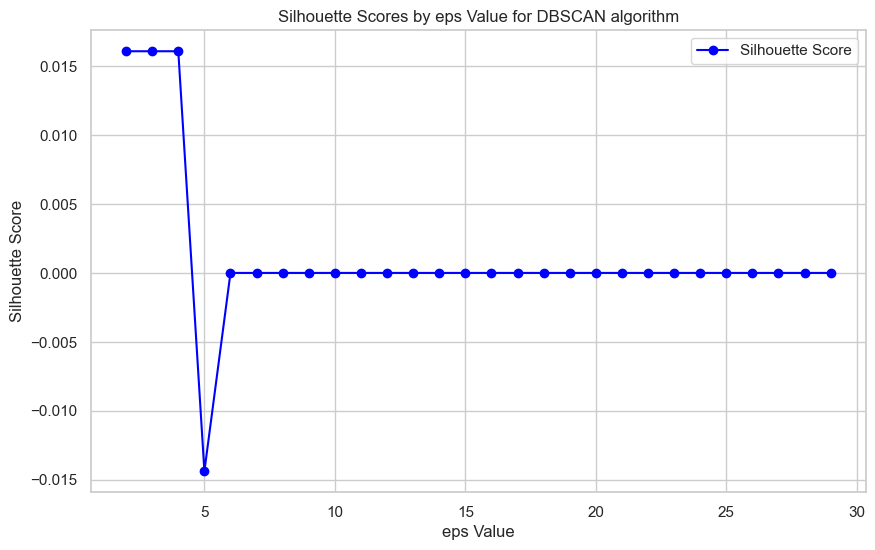

In [23]:
from clustering_algorithms.hdbscan import calc_hdbscan
from utils.text_to_embeddings import calc_embeddings
from sklearn.decomposition import PCA

# transformed_data_embeddings = calc_embeddings(x_test_bbc[text_col].to_list())

# Reduce the dimensionality of embeddings
pca = PCA(n_components=24) 
reduced_data = pca.fit_transform(transformed_data_embeddings)

# define the various cluster size values
cluster_size_values = [i for i in range(2, 30)]

# calculate the optimun kappa with HDBSCAN clustering algorithm via Silhouette score and using sentence Transformer MPNET-V2
hdbscan_results_mpnet_embeddings= calc_hdbscan(transformed_data=transformed_data_embeddings,
                                               min_cluster_size_values=cluster_size_values, 
                                               min_samples=10)

#### USING OPENAI ADA TEXT EMBEDDINGS

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 422.26it/s]

The optimal min_cluster_size based on Silhouette score is: 5
The number of clusters for optimal min_cluster_size is: 0


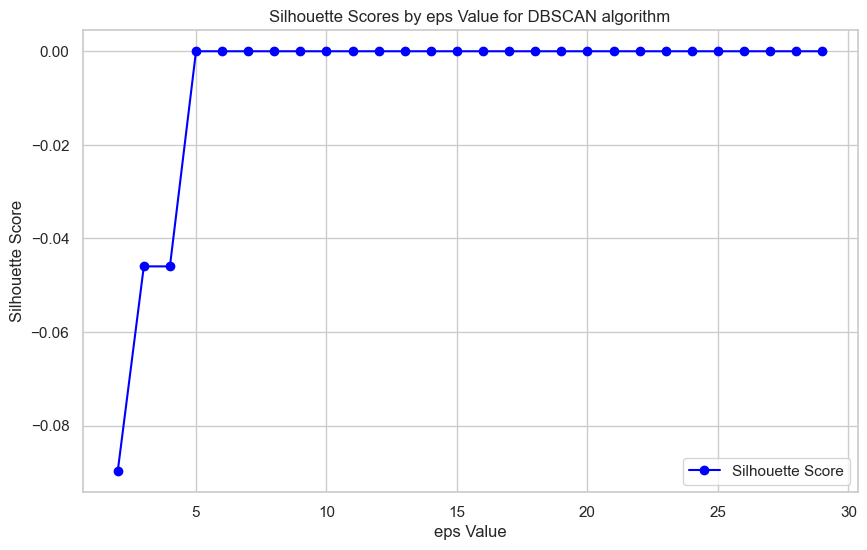

In [7]:
from clustering_algorithms.hdbscan import calc_hdbscan
from utils.text_to_embeddings import calc_embeddings
from sklearn.decomposition import PCA

# transformed_data_embeddings = calc_embeddings(x_test_bbc[text_col].to_list())

# Reduce the dimensionality of embeddings
pca = PCA(n_components=24) 
reduced_data = pca.fit_transform(transformed_data_embeddings)

# define the various cluster size values
cluster_size_values = [i for i in range(2, 30)]

# calculate the optimun kappa with HDBSCAN clustering algorithm via Silhouette score and using OPENAI embeddings ADA-002
hdbscan_results_mpnet_embeddings= calc_hdbscan(transformed_data=reduced_data,
                                               min_cluster_size_values=cluster_size_values, 
                                               min_samples=10)

### LOAD SECOND DATASET - 20NEWSGROUPS - DIFFICULT DATASET WITH MORE LABELS (GROUND TRUTH K=20)

In [7]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import numpy as np

data_20newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents_20newsgroups = data_20newsgroups.data
labels_20newsgroups = data_20newsgroups.target
labels_names_20newsgroups = data_20newsgroups.target_names
news_dict = {
    'label': labels_20newsgroups,
    'comment': documents_20newsgroups,
}
news_df = pd.DataFrame(news_dict)
news_df['label_name'] = news_df['label'].apply(lambda x: labels_names_20newsgroups[x])
news_cols = news_df.columns.to_list()
print(f'The length of the dataset 20newsgroups is: {len(news_df)}')
print('------------------------------------------------------------------------------------------------------------------------')
print(news_cols)
print(f'The unique labels of the dataset are:\n{news_df.label.unique()}')
print('------------------------------------------------------------------------------------------------------------------------')
print(f'The labels names are:\n{news_df.label_name.unique()}')

The length of the dataset 20newsgroups is: 18846
------------------------------------------------------------------------------------------------------------------------
['label', 'comment', 'label_name']
The unique labels of the dataset are:
[10  3 17  4 12 19 11 13  0  8  7  5  1 14 16  6  9 18  2 15]
------------------------------------------------------------------------------------------------------------------------
The labels names are:
['rec.sport.hockey' 'comp.sys.ibm.pc.hardware' 'talk.politics.mideast'
 'comp.sys.mac.hardware' 'sci.electronics' 'talk.religion.misc'
 'sci.crypt' 'sci.med' 'alt.atheism' 'rec.motorcycles' 'rec.autos'
 'comp.windows.x' 'comp.graphics' 'sci.space' 'talk.politics.guns'
 'misc.forsale' 'rec.sport.baseball' 'talk.politics.misc'
 'comp.os.ms-windows.misc' 'soc.religion.christian']


#### KEEP A SAMPLE OF THE DATASET AND LOAD THE PRETRAINED SPACY MODEL

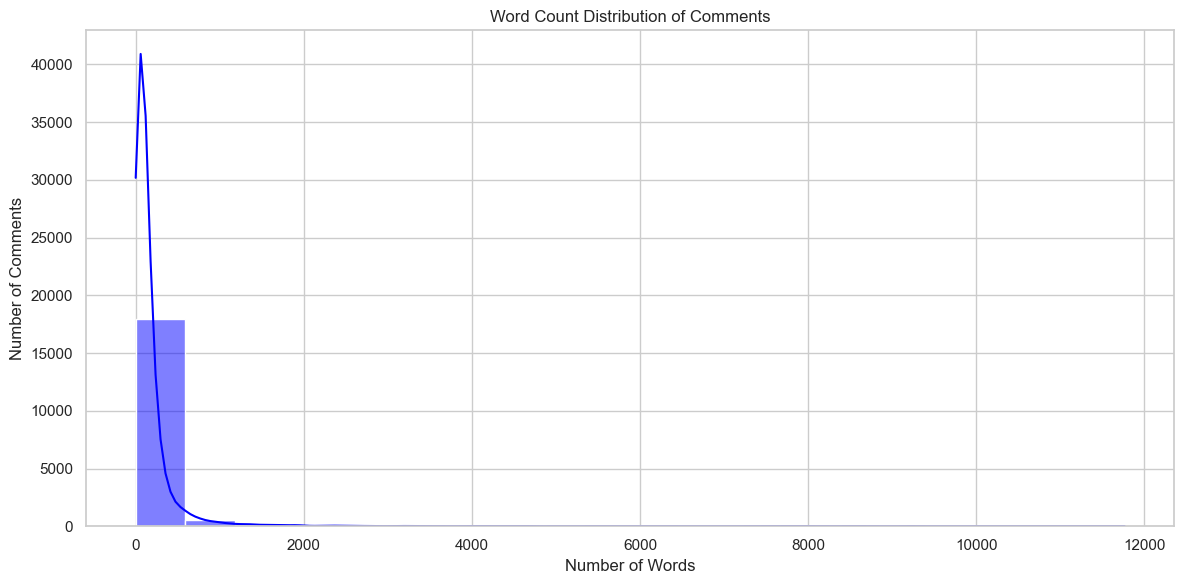

In [8]:
from utils.plot_words_distribution import plot_distribution_of_words

# define the column name of the text
text_col = 'comment'
label_col='label'

# plot the words distribution
plot_distribution_of_words(news_df, text_col)

In [9]:
from sklearn.model_selection import train_test_split
from langdetect import detect, DetectorFactory
from utils.load_pretrained_spacy_model import load_pretrained_model

x_train_news, x_test_news, y_train_news, y_test_news = train_test_split(
    news_df,
    news_df['label'],
    test_size=0.05,
    random_state=42,
    stratify=news_df['label']
)

# load the pretrained spacy model
x_test_news, nlp_pretrained_name = load_pretrained_model(df=x_test_news, text_col=text_col)

The language of the dataset is: en


### 1ST CLUSTERING TECHNIQUE: KMEANS

We are going to implement the original KMeans without using any constraints. For transforming the data we are going to use TF-IDF and FastText embeddings.

#### USING TF-IDF VECTORIZATION

C:\1. Python\LLM_mods_Topic_Modelling\venv\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\1. Python\LLM_mods_Topic_Modelling\venv\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ca', 'nt'] not in stop_words.
  warnings.warn(


Sentences transformed successfully via TF-IDF vectorizer


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:47<00:00,  1.05it/s]

The optimum kappa based on Silhouette score is: 8


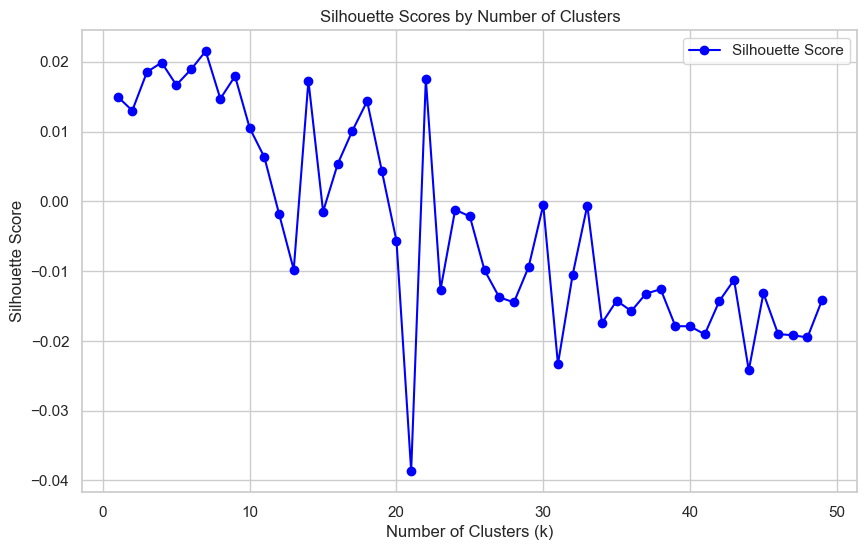

The NMI score is: 0.07296668820802615 for the best Kappa 8
The AMI score is: 0.03779121255160148 for the best Kappa 8
The ARI score is: 0.009188711009387505 for the best Kappa 8


In [11]:
import spacy
from clustering_algorithms.kmeans import calc_kmeans
from utils.text_to_embeddings import calc_tf_idf_vectors

# define the spacy model
nlp = spacy.load(nlp_pretrained_name)

# define the corpus
corpus = news_df[text_col].to_list()

# calc TF-IDF features
transformed_data_tfidf = calc_tf_idf_vectors(corpus, x_test_news[text_col], nlp)

max_num_of_clusters = 50

# calculate the optimun kappa with KMeans via Silhouette score and using TF-IDF
kmeans_results_tfidf_v2 = calc_kmeans(transformed_data=transformed_data_tfidf,
                                      max_clusters=max_num_of_clusters,
                                      true_labels=y_test_news)

#### USING FASTTEXT VECTORIZATION

Sentences transformed successfully via pretrained FastText language model


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:13<00:00,  3.69it/s]

The optimum kappa based on Silhouette score is: 2


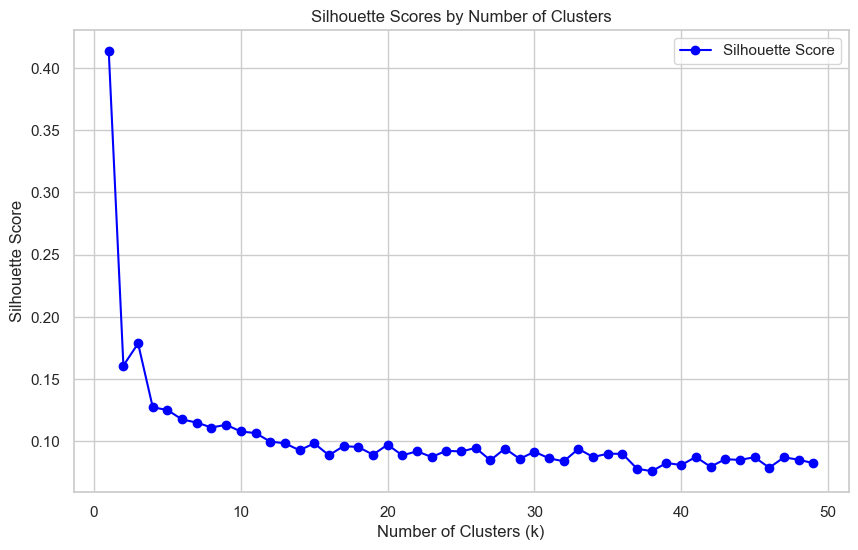

The NMI score is: 0.027715474728301777 for the best Kappa 2
The AMI score is: 0.02151581989092304 for the best Kappa 2
The ARI score is: 0.0019031596534338654 for the best Kappa 2


In [12]:
from clustering_algorithms.kmeans import calc_kmeans
from utils.text_to_embeddings import train_fasttext_and_transform

# define the corpus
corpus = news_df[text_col].to_list()

transformed_data_fasttext = train_fasttext_and_transform(corpus, x_test_news[text_col].to_list(), text_col)

max_num_of_clusters = 50
# calculate the optimun kappa with KMeans via Silhouette score and using FastText
kmeans_results_tfidf_v2 = calc_kmeans(transformed_data=transformed_data_fasttext,
                                      max_clusters=max_num_of_clusters,
                                      true_labels=y_test_news)

#### USING SENTENCE TRANSFORMER EMBEDDINGS

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:05<00:00,  9.13it/s]


The optimum kappa based on Silhouette score is: 12


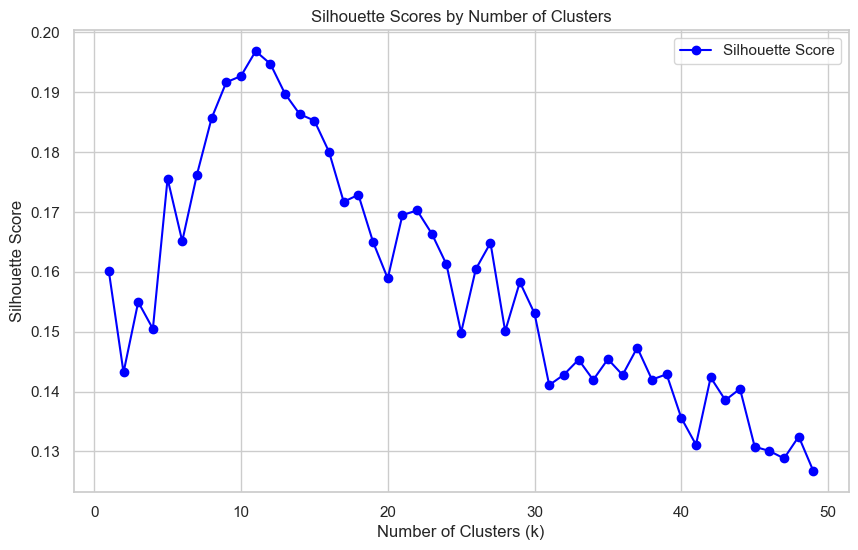

The NMI score is: 0.5279853463945202 for the best Kappa 12
The AMI score is: 0.5059369093457059 for the best Kappa 12
The ARI score is: 0.3242231841511328 for the best Kappa 12


In [18]:
from clustering_algorithms.kmeans import calc_kmeans
from utils.text_to_embeddings import calc_embeddings
from sklearn.decomposition import PCA

# transform the comments into embbeddings via sentence transformer
transformed_data_embeddings_v2 = calc_embeddings(x_test_news[text_col].to_list())

# Reduce the dimensionality of embeddings
pca = PCA(n_components=16)
reduced_data = pca.fit_transform(transformed_data_embeddings_v2)

max_num_of_clusters = 50
# calculate the optimun kappa with KMeans Constrained via Silhouette score and using sentence Transformer MPNET-V2
kmeans_results_mpnet_embeddings_v2 = calc_kmeans(transformed_data=reduced_data,
                                                 max_clusters=max_num_of_clusters,
                                                 true_labels=y_test_news)

#### USING OPENAI ADA TEXT EMBEDDINGS

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:09<00:00,  5.30it/s]

The optimum kappa based on Silhouette score is: 16


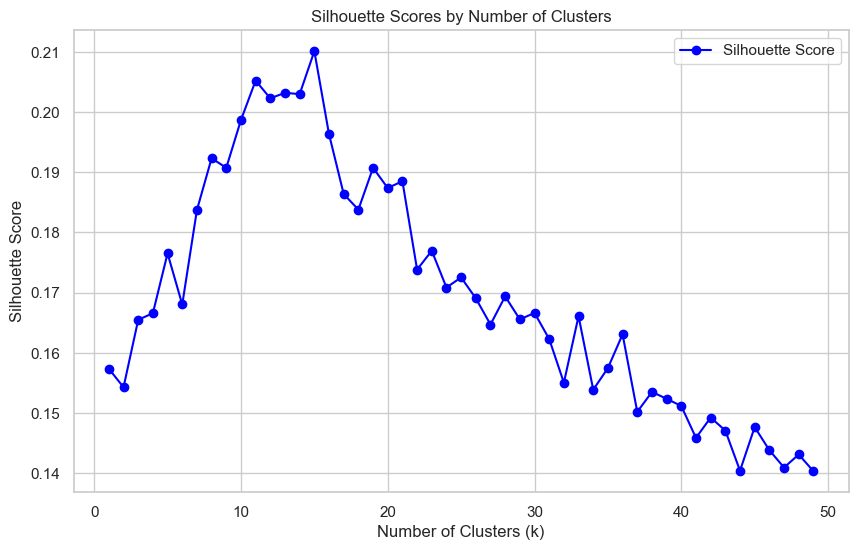

The NMI score is: 0.62 for the best Kappa 16
The AMI score is: 0.6 for the best Kappa 16
The ARI score is: 0.43 for the best Kappa 16


In [10]:
from clustering_algorithms.kmeans import calc_kmeans
from utils.GPT_Prompting import PromptingGPT
from sklearn.decomposition import PCA

# Create a new instance of GPT model in each iteration
gpt_embeddings = PromptingGPT()
openai_ada_embeddings_v2 = gpt_embeddings.get_embeddings(texts=x_test_news[text_col], max_token_length=8000)

# Reduce the dimensionality of embeddings
pca = PCA(n_components=16) 
reduced_data = pca.fit_transform(openai_ada_embeddings_v2)

max_num_of_clusters = 50
# calculate the optimun kappa with KMeans via Silhouette score and using OPENAI embeddings ADA-002
kmeans_results_ada_embeddings = calc_kmeans(transformed_data=reduced_data, 
                                            max_clusters=max_num_of_clusters, 
                                            true_labels=y_test_news)

### 2ND CLUSTERING TECHNIQUE: KMEANS CONSTRAINED (DEFINE MIN SIZE OF CLUSTERS)

#### USING SENTENCE TRANSFORMER EMBEDDINGS

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [03:07<00:00,  3.83s/it]

The optimum kappa based on Penalized Silhouette score is: 5


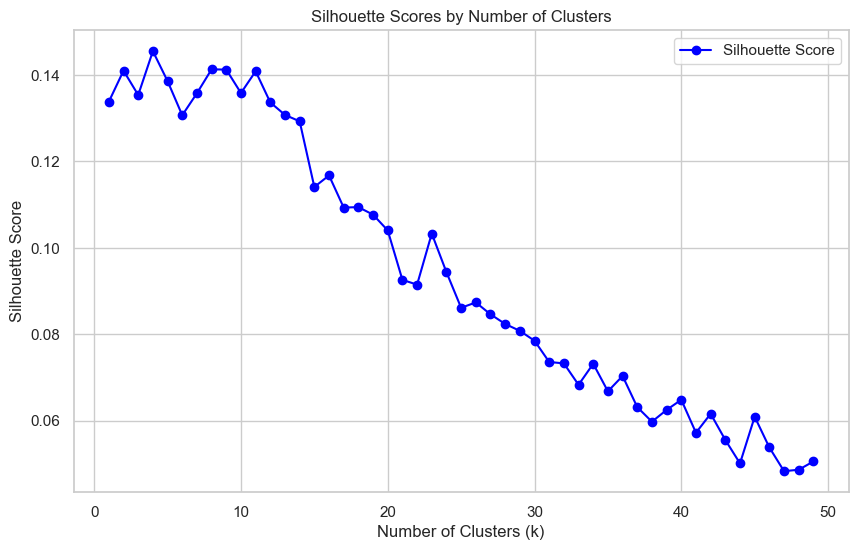

The NMI score is: 0.427606653607403 for the best Kappa 5
The AMI score is: 0.41402519190041603 for the best Kappa 5
The ARI score is: 0.1792252400987519 for the best Kappa 5


In [19]:
from clustering_algorithms.kmeans_constrained import get_number_of_clusters_with_statistic_constrained
from utils.text_to_embeddings import calc_embeddings
from sklearn.decomposition import PCA

# transformed_data_embeddings_v2 = calc_embeddings(x_test_news[text_col].to_list())

# Reduce the dimensionality of embeddings
pca = PCA(n_components=16) 
reduced_data = pca.fit_transform(transformed_data_embeddings_v2)

max_num_of_clusters = 50

# calculate the optimun kappa with KMeans Constrained via Silhouette score and using sentence Transformer MPNET-V2
kmeans_cv_results_mpnet_embeddings = get_number_of_clusters_with_statistic_constrained(transformed_data=reduced_data, 
                                                                                       max_clusters=max_num_of_clusters, 
                                                                                       cluster_min_size=5, 
                                                                                       true_labels=y_test_news)

#### USING OPENAI ADA TEXT EMBEDDINGS

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [03:06<00:00,  3.81s/it]

The optimum kappa based on Penalized Silhouette score is: 13


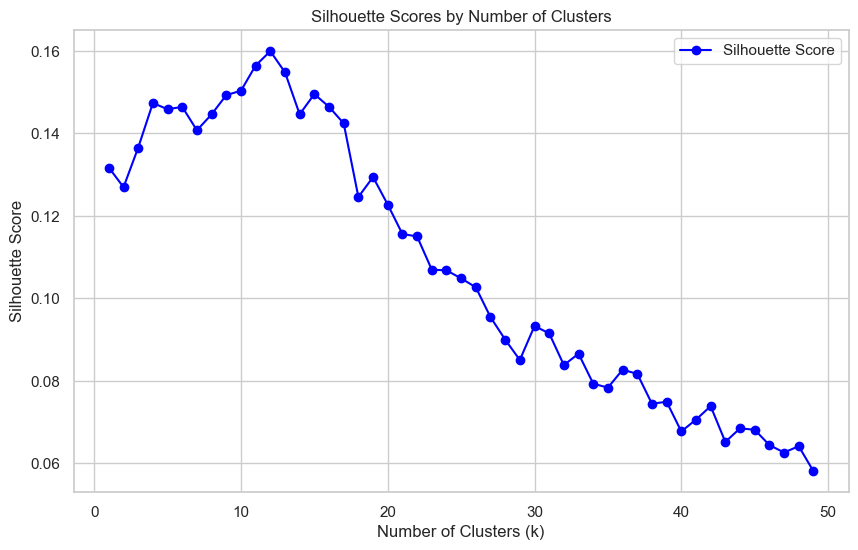

The NMI score is: 0.6002137926741008 for the best Kappa 13
The AMI score is: 0.5784548086035068 for the best Kappa 13
The ARI score is: 0.4012671165060412 for the best Kappa 13


In [20]:
from clustering_algorithms.kmeans import calc_kmeans
from utils.GPT_Prompting import PromptingGPT
from sklearn.decomposition import PCA

# # Create a new instance of GPT model
# gpt_embeddings = PromptingGPT()
# openai_ada_embeddings_v2 = gpt_embeddings.get_embeddings(texts=x_test_news[text_col], max_token_length=8000)

# Reduce the dimensionality of embeddings
pca = PCA(n_components=16) 
reduced_data = pca.fit_transform(openai_ada_embeddings_v2)

max_num_of_clusters = 50
# calculate the optimun kappa with KMeans Constrained via Silhouette score and using OPENAI embeddings ADA-002
kmeans_results_ada_embeddings =  get_number_of_clusters_with_statistic_constrained(transformed_data=reduced_data,
                                                                                   max_clusters=max_num_of_clusters,
                                                                                   cluster_min_size=5,
                                                                                   true_labels=y_test_news)

### 3RD CLUSTERING TECHNIQUE: AGGLOMERATIVE

#### USING SENTENCE TRANSFORMER EMBEDDINGS

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:01<00:00, 27.59it/s]


The optimal number of clusters based on Silhouette score is: 13


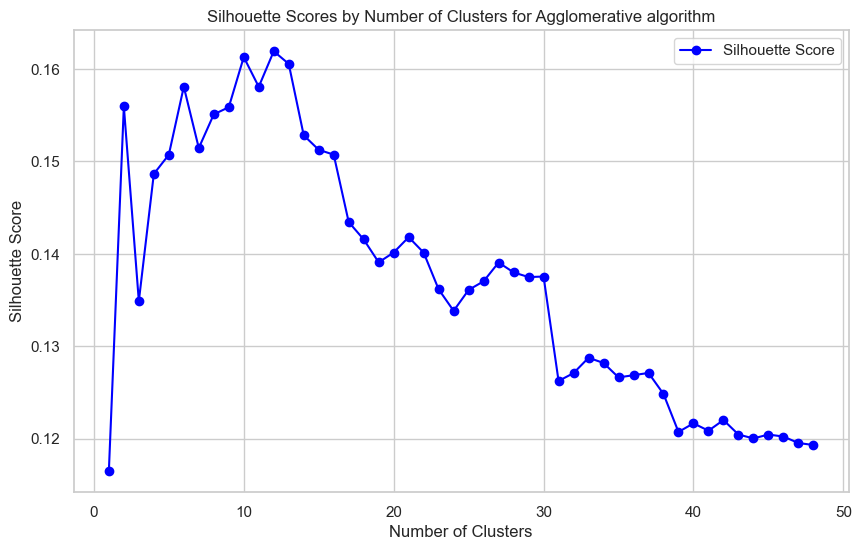

The NMI score is: 0.5074330339214538 for the best Kappa 13
The AMI score is: 0.4822564503140988 for the best Kappa 13
The ARI score is: 0.2902013627989462 for the best Kappa 13


In [21]:
from clustering_algorithms.agglomerative import calc_agglomerative
from utils.text_to_embeddings import calc_embeddings
from sklearn.decomposition import PCA

# transformed_data_embeddings_v2 = calc_embeddings(x_test_news[text_col].to_list())

# Reduce the dimensionality of embeddings
pca = PCA(n_components=16) 
reduced_data = pca.fit_transform(transformed_data_embeddings_v2)
max_num_of_clusters = 50

cluster_values = range(1,50)

# calculate the optimun kappa with Agglomerative clustering algorithm via Silhouette score and using sentence Transformer MPNET-V2
agglomerative_results_mpnet_embeddings = calc_agglomerative(transformed_data=reduced_data,
                                                            n_clusters_values=cluster_values,
                                                            true_labels=y_test_news)

#### USING OPENAI ADA TEXT EMBEDDINGS

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:01<00:00, 28.19it/s]


The optimal number of clusters based on Silhouette score is: 13


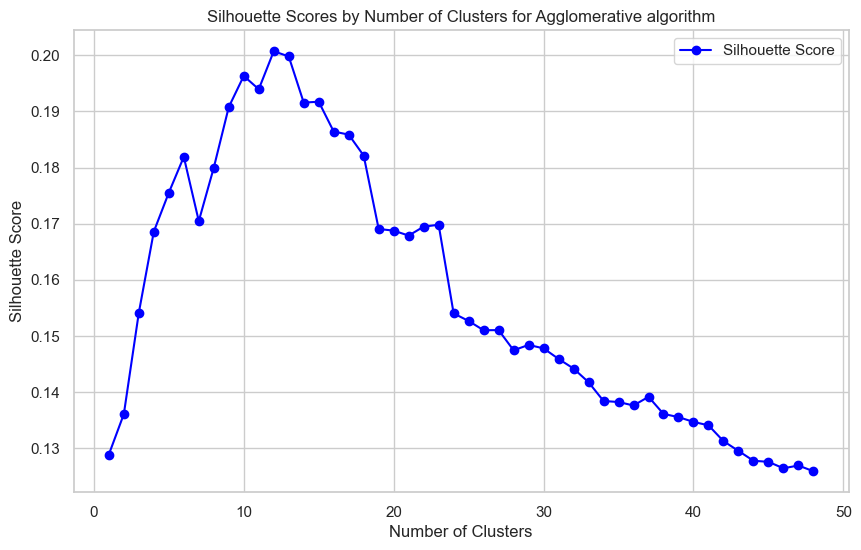

The NMI score is: 0.6020735534293069 for the best Kappa 13
The AMI score is: 0.5816666269831311 for the best Kappa 13
The ARI score is: 0.37225930786779216 for the best Kappa 13


In [22]:
from clustering_algorithms.agglomerative import calc_agglomerative
from utils.GPT_Prompting import PromptingGPT
from sklearn.decomposition import PCA

# # Create a new instance of GPT model
# gpt_embeddings = PromptingGPT()
# openai_ada_embeddings_v2 = gpt_embeddings.get_embeddings(texts=x_test_news[text_col], max_token_length=8000)

# Reduce the dimensionality of embeddings
pca = PCA(n_components=16) 
reduced_data = pca.fit_transform(openai_ada_embeddings_v2)


cluster_values = range(1,50)

# calculate the optimun kappa with Agglomerative clustering algorithm via Silhouette score and using OPENAI embeddings ADA-002
agglomerative_results_ada_embeddings = calc_agglomerative(transformed_data=reduced_data,
                                                            n_clusters_values=cluster_values,
                                                            true_labels=y_test_news)

### 4TH CLUSTERING TECHNIQUE: HDBSCAN (HIERARCHICAL DENSITY-BASED CLUSTERING NON-PARAMETRIC ALGORITHM)

#### USING SENTENCE TRANSFORMER EMBEDDINGS

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 38.09it/s]


The optimal min_cluster_size based on Silhouette score is: 2
The number of clusters for optimal min_cluster_size is: 2


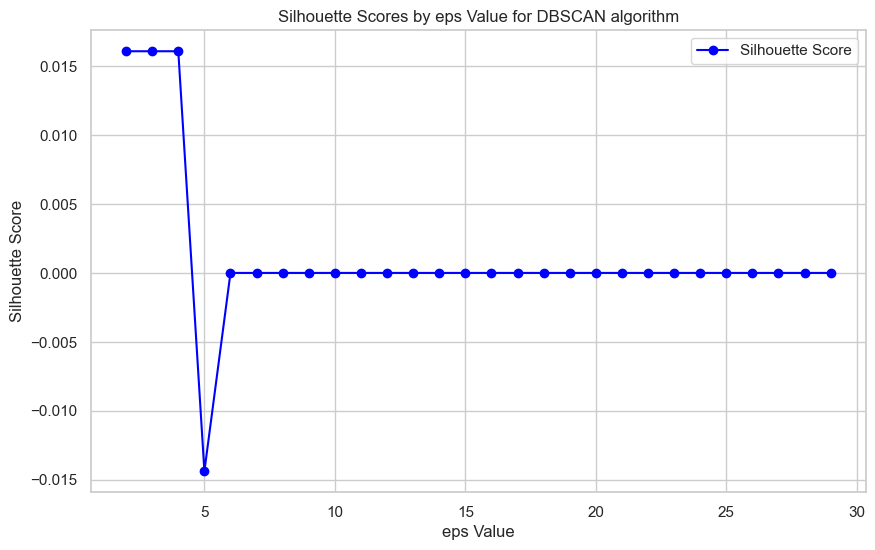

In [23]:
from clustering_algorithms.hdbscan import calc_hdbscan
from utils.text_to_embeddings import calc_embeddings
from sklearn.decomposition import PCA

# transformed_data_embeddings_v2 = calc_embeddings(x_test_news[text_col].to_list())

# Reduce the dimensionality of embeddings
pca = PCA(n_components=24) 
reduced_data = pca.fit_transform(transformed_data_embeddings_v2)

# define the various cluster size values
cluster_size_values = [i for i in range(2, 30)]

# calculate the optimun kappa with HDBSCAN clustering algorithm via Silhouette score and using sentence Transformer MPNET-V2
hdbscan_results_mpnet_embeddings= calc_hdbscan(transformed_data=transformed_data_embeddings,
                                               min_cluster_size_values=cluster_size_values, 
                                               min_samples=10)

#### USING OPENAI ADA TEXT EMBEDDINGS

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:01<00:00, 19.40it/s]

The optimal min_cluster_size based on Silhouette score is: 2
The number of clusters for optimal min_cluster_size is: 2


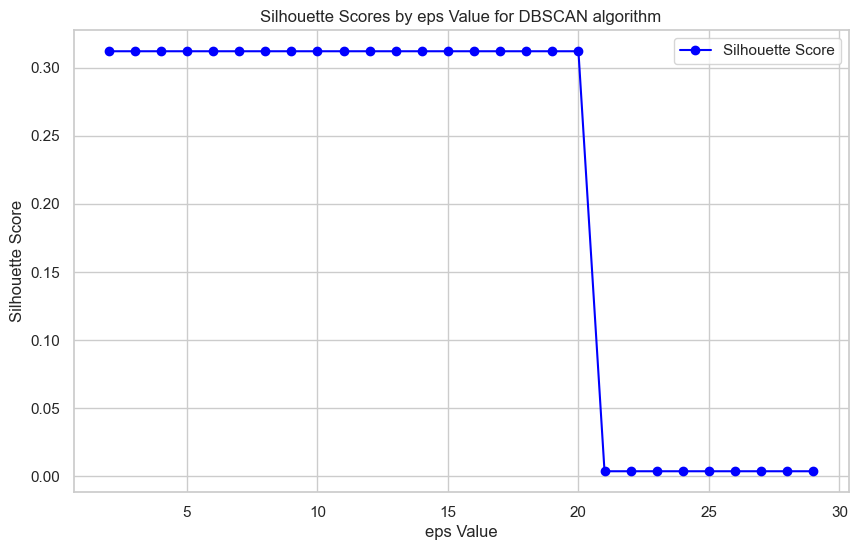

In [24]:
from clustering_algorithms.hdbscan import calc_hdbscan
from utils.text_to_embeddings import calc_embeddings
from sklearn.decomposition import PCA

# # Create a new instance of GPT model
# gpt_embeddings = PromptingGPT()
# openai_ada_embeddings_v2 = gpt_embeddings.get_embeddings(texts=x_test_news[text_col], max_token_length=8000)

# Reduce the dimensionality of embeddings
pca = PCA(n_components=24) 
reduced_data = pca.fit_transform(openai_ada_embeddings_v2)

# define the various cluster size values
cluster_size_values = [i for i in range(2, 30)]

# calculate the optimun kappa with HDBSCAN clustering algorithm via Silhouette score and using OPENAI embeddings ADA-002
hdbscan_results_mpnet_embeddings= calc_hdbscan(transformed_data=reduced_data,
                                               min_cluster_size_values=cluster_size_values, 
                                               min_samples=10)